Nilesh Misra                                                    
LGM TASK:                                                               
2.2:Prediction using Decision Tree  Algorithm

In [28]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [29]:
df=pd.read_csv("/content/drive/MyDrive/LGM/IRIS classificaiton TASk/iris.data", 
                  sep=',', 
                  names=["sepal length", "sepal width", "petal length","petal width","class_"])

In [30]:
df.head()

,sepal length,sepal width,petal length,petal width,class_
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
print(df.shape)

(150, 5)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class_        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
df.class_.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class_, dtype: int64

In [35]:
print(df.isna().sum())

sepal length    0
sepal width     0
petal length    0
petal width     0
class_          0
dtype: int64


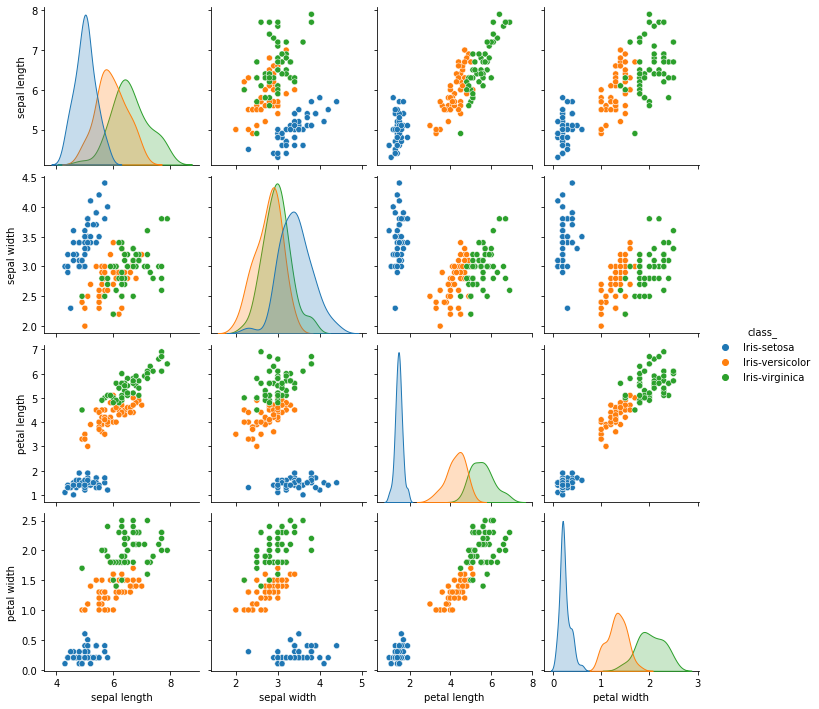

In [36]:
sns.pairplot(df, hue='class_')
plt.show()

In [37]:
X = df[["sepal length", "sepal width", "petal length","petal width"]]
y = df['class_']

In [38]:
Xvalidationrain, Xvalidationest, Yvalidationrain, Yvalidationest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xvalidation, Xtest_validation, Yvalidation, Ytest_validation = train_test_split(Xvalidationrain, Yvalidationrain, test_size=0.10, random_state=42)

In [39]:
df_tree = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
df_tree.fit(Xvalidation, Yvalidation)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(125.55000000000001, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(83.7, 170.84571428571428, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(167.4, 170.84571428571428, 'X[3] <= 1.55\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(83.7, 139.78285714285715, 'X[2] <= 5.0\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(41.85, 108.72, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(125.55000000000001, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(251.10000000000002, 139.78285714285715, 'X[2] <= 5.05\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(209.25, 108.72, 'X[1] <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(167.4, 77.65714285714284, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(251.10000000000002, 77.65714285714284, 'X[2] <= 4.9\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(209.25, 46.59428571428572, 'X[1] <= 3.1\ngini = 0.5\nsamples = 2\nvalue = 

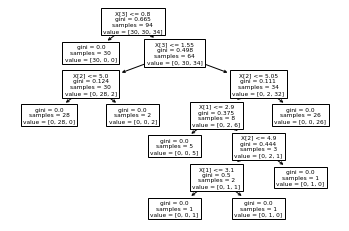

In [40]:
tree.plot_tree(df_tree)

In [41]:
print('Accuracy score is:',cross_val_score(df_tree, Xvalidation, Yvalidation, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9361559139784946


In [42]:
Y_hat = df_tree.predict(Xtest_validation)
print('Accuracy score for validation test data is:',accuracy_score(Ytest_validation, Y_hat))
multilabel_confusion_matrix(Ytest_validation , Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]])

In [43]:
Yvalidation_hat = df_tree.predict(Xvalidationest)
Yvalidation_hat

print('Model Accuracy Score on totally unseen data(Xvalidationest) is:',accuracy_score(Yvalidationest, Yvalidation_hat)*100,'%')
multilabel_confusion_matrix(Yvalidationest , Yvalidation_hat)

Model Accuracy Score on totally unseen data(Xvalidationest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230769

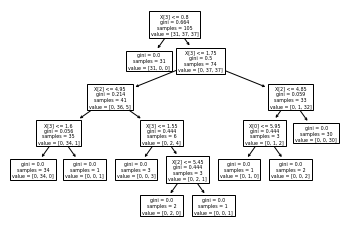

In [44]:
df_tree = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
df_tree.fit(Xvalidationrain, Yvalidationrain)

#Visualize tree structure..
tree.plot_tree(df_tree)

In [45]:
Yvalidation_Fhat = df_tree.predict(Xvalidationest)
Yvalidation_Fhat

print('Model Accuracy Score on totally unseen data(Xvalidationest) is:',accuracy_score(Yvalidationest, Yvalidation_Fhat)*100,'%')
multilabel_confusion_matrix(Yvalidationest , Yvalidation_Fhat)

Model Accuracy Score on totally unseen data(Xvalidationest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])

In [47]:
Test_point = [[6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5],
              [5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5]]

print(df_tree.predict(Test_point))

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']
